**IMPORT LIBRARY**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Library untuk Preprocessing dan Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Library untuk Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Library untuk Evaluasi
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    auc,
    f1_score
)

# Mengatur agar warning tidak ditampilkan
warnings.filterwarnings('ignore')
# Mengatur style visualisasi
sns.set(style='whitegrid')

print("Semua library berhasil di-import.\n")

Semua library berhasil di-import.



**1. Importing Data**

In [27]:
print("--- 1. Importing Data ---")
try:
    df_train = pd.read_csv('data_training.csv')
    df_test = pd.read_csv('data_testing.csv')

    print("Data training berhasil dimuat:")
    print(df_train.head())
    print("\nData testing (unlabeled) berhasil dimuat:")
    print(df_test.head())
    print("-" * 30 + "\n")

except FileNotFoundError:
    print("Error: Pastikan file 'data_training.csv' dan 'data_testing.csv' ada di folder yang sama.")
    exit()

--- 1. Importing Data ---
Data training berhasil dimuat:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.3             0.740         0.08             1.7      0.094   
1            8.1             0.575         0.22             2.1      0.077   
2           10.1             0.430         0.40             2.6      0.092   
3           12.9             0.500         0.55             2.8      0.072   
4            8.4             0.360         0.32             2.2      0.081   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 10.0                  45.0  0.99576  3.24       0.50   
1                 12.0                  65.0  0.99670  3.29       0.51   
2                 13.0                  52.0  0.99834  3.22       0.64   
3                  7.0                  24.0  1.00012  3.09       0.68   
4                 32.0                  79.0  0.99640  3.30       0.72   

   alcohol  quality    Id  
0

**2. Handling Missing Value**

In [29]:
print("--- 2. Handling Missing Value ---")
print("Jumlah missing values di data training (sebelum):")
print(df_train.isnull().sum())
# Opsi: Mengisi nilai (imputasi) atau menghapus. Kita hapus untuk kesederhanaan.
df_train = df_train.dropna()
print("\nJumlah missing values di data training (setelah dropna):")
print(df_train.isnull().sum())
# Lakukan juga pada data test jika ada (meskipun imputasi lebih disarankan)
df_test = df_test.dropna()
print("-" * 30 + "\n")

--- 2. Handling Missing Value ---
Jumlah missing values di data training (sebelum):
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Jumlah missing values di data training (setelah dropna):
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
------------------------------



**3. Handling Duplicate Value**

In [30]:
print("--- 3. Handling Duplicate Value ---")
print(f"Jumlah data duplikat di data training (sebelum): {df_train.duplicated().sum()}")
df_train = df_train.drop_duplicates()
print(f"Jumlah data duplikat di data training (setelah drop): {df_train.duplicated().sum()}")
print("-" * 30 + "\n")

--- 3. Handling Duplicate Value ---
Jumlah data duplikat di data training (sebelum): 0
Jumlah data duplikat di data training (setelah drop): 0
------------------------------



**4. EDA (Exploratory Data Analysis)**

--- 4. EDA (Exploratory Data Analysis) ---
Info data training:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         857 non-null    float64
 1   volatile acidity      857 non-null    float64
 2   citric acid           857 non-null    float64
 3   residual sugar        857 non-null    float64
 4   chlorides             857 non-null    float64
 5   free sulfur dioxide   857 non-null    float64
 6   total sulfur dioxide  857 non-null    float64
 7   density               857 non-null    float64
 8   pH                    857 non-null    float64
 9   sulphates             857 non-null    float64
 10  alcohol               857 non-null    float64
 11  quality               857 non-null    int64  
 12  Id                    857 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 87.2 KB

Statistik desk

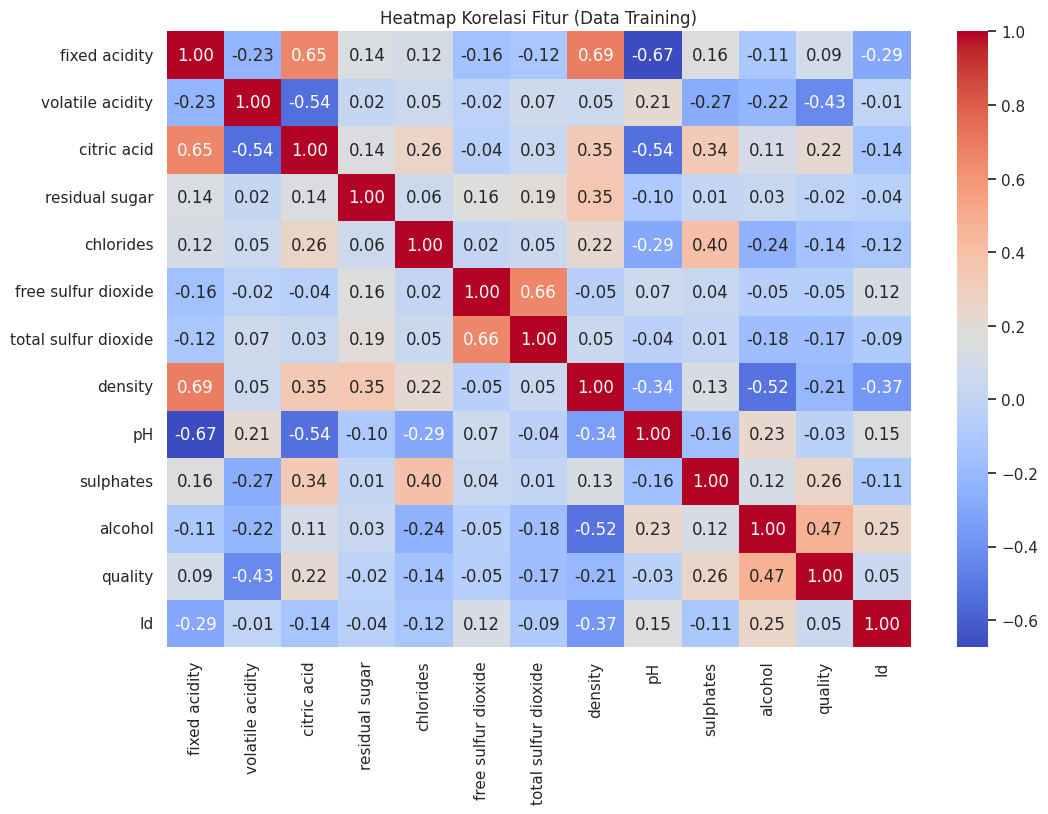

------------------------------



In [31]:
print("--- 4. EDA (Exploratory Data Analysis) ---")
print("Info data training:")
df_train.info()

print("\nStatistik deskriptif data training:")
print(df_train.describe())

# Visualisasi Korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur (Data Training)')
plt.show()
print("-" * 30 + "\n")

**5. Train Validation Split**

In [32]:
print("--- 5. Train Validation Split ---")
# Pisahkan fitur (X) dan target (y)
# Asumsi 'quality' adalah target dan 'Id' adalah identifier
X = df_train.drop(['quality', 'Id'], axis=1)
y = df_train['quality']

# Simpan Id data test dan siapkan data test untuk prediksi
test_ids = df_test['Id']
X_unlabeled = df_test.drop('Id', axis=1)

# Lakukan scaling
# Penting: Scaling dilakukan setelah memisahkan Id
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Fit dan transform data train
X_unlabeled_scaled = scaler.transform(X_unlabeled) # Hanya transform data test

# Split data training menjadi train dan validation set
# stratify=y penting untuk data imbalance agar proporsi kelas di train dan val sama
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_val: {X_val.shape}")
print(f"Bentuk y_train: {y_train.shape}")
print(f"Bentuk y_val: {y_val.shape}")
print(f"Bentuk X_unlabeled (scaled): {X_unlabeled_scaled.shape}")
print("-" * 30 + "\n")

--- 5. Train Validation Split ---
Bentuk X_train: (685, 11)
Bentuk X_val: (172, 11)
Bentuk y_train: (685,)
Bentuk y_val: (172,)
Bentuk X_unlabeled (scaled): (286, 11)
------------------------------



**6. Visualisasi Distribusi Target (Data Train)**

--- 6. Visualisasi Distribusi Target ---


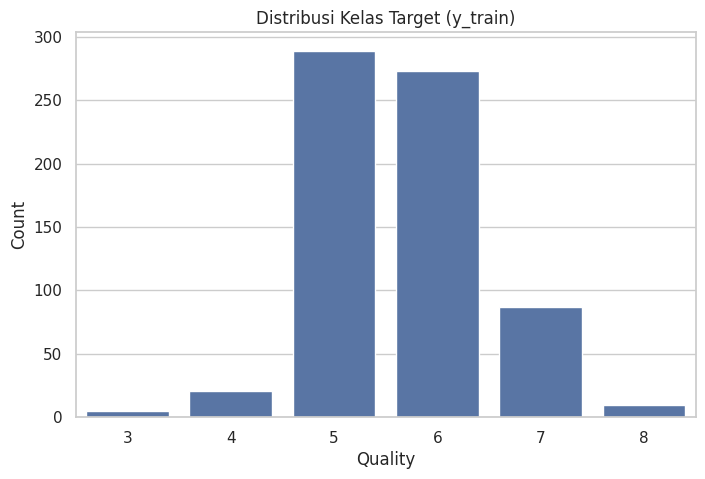

Periksa plot untuk melihat apakah kelas tidak seimbang (imbalance).
------------------------------



In [33]:
print("--- 6. Visualisasi Distribusi Target ---")
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train)
plt.title('Distribusi Kelas Target (y_train)')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()
print("Periksa plot untuk melihat apakah kelas tidak seimbang (imbalance).")
print("-" * 30 + "\n")

**7. Handling Imbalance Class (Test)**

--- 7. Handling Imbalance Class ---
Bentuk data setelah Undersampling: (30, 11)


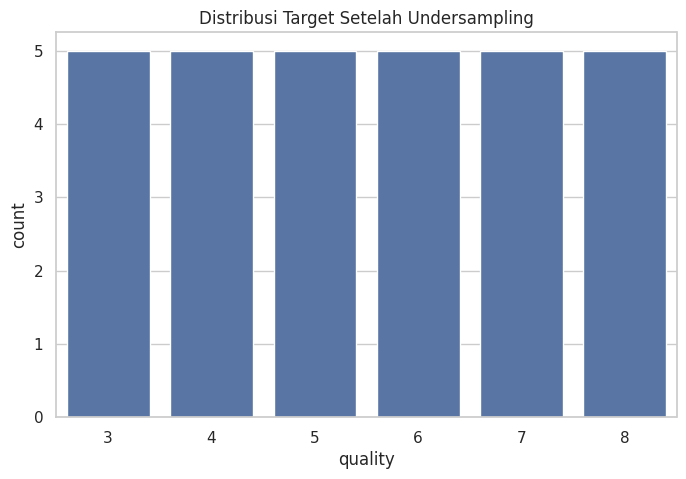

Error SMOTE: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5. Mencoba dengan k_neighbors=1
Bentuk data setelah Oversampling (SMOTE): (1734, 11)


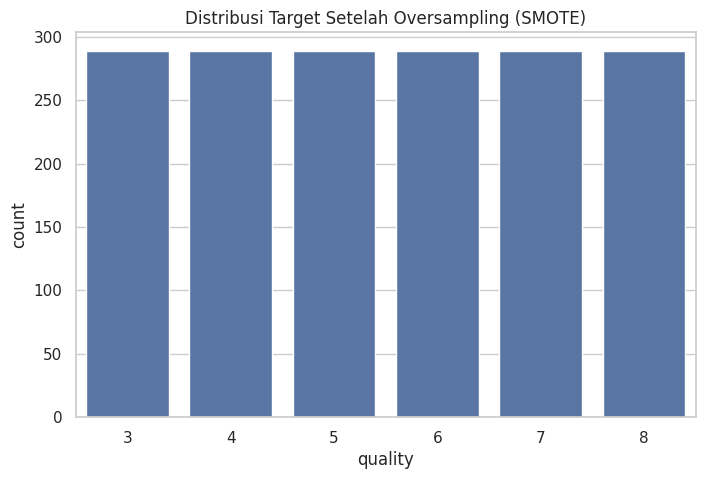

------------------------------



In [34]:
print("--- 7. Handling Imbalance Class ---")

# a) Undersampling Test
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
print(f"Bentuk data setelah Undersampling: {X_train_under.shape}")

# Visualisasi setelah Undersampling
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_under)
plt.title('Distribusi Target Setelah Undersampling')
plt.show()

# b) Oversampling Test (SMOTE)
# SMOTE mungkin error jika satu kelas punya < k_neighbors (default 5).
# Kita coba atur k_neighbors jika perlu.
try:
    smote = SMOTE(random_state=42)
    X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
except ValueError as e:
    print(f"Error SMOTE: {e}. Mencoba dengan k_neighbors=1")
    # Cari tahu jumlah sampel minimum
    min_samples = y_train.value_counts().min()
    k_neighbors = max(1, min_samples - 1) # k_neighbors harus < jumlah sampel di kelas minoritas
    smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
    X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print(f"Bentuk data setelah Oversampling (SMOTE): {X_train_over.shape}")

# Visualisasi setelah Oversampling
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_over)
plt.title('Distribusi Target Setelah Oversampling (SMOTE)')
plt.show()

# Kita akan melatih 3 set data: Original, Undersampled, Oversampled
datasets = {
    "Original": (X_train, y_train),
    "Undersampled": (X_train_under, y_train_under),
    "Oversampled": (X_train_over, y_train_over)
}
print("-" * 30 + "\n")

**8. Pelatihan Model**

In [36]:
print("--- 8. Pelatihan Model ---")
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

trained_models = {} # Dictionary untuk menyimpan semua model yang dilatih

for data_name, (X_t, y_t) in datasets.items():
    print(f"Melatih model dengan data: {data_name}")
    for model_name, model in models.items():
        # Buat instance baru dari model
        current_model = model.__class__(**model.get_params())

        # Latih model
        current_model.fit(X_t, y_t)

        # Simpan model yang sudah dilatih
        full_model_name = f"{model_name} ({data_name})"
        trained_models[full_model_name] = current_model
        print(f"  -> {full_model_name} ... Selesai.")

print("\nSemua model telah dilatih.")
print(f"Total model yang dilatih: {len(trained_models)}")
print("-" * 30 + "\n")

--- 8. Pelatihan Model ---
Melatih model dengan data: Original
  -> Decision Tree (Original) ... Selesai.
  -> Random Forest (Original) ... Selesai.
Melatih model dengan data: Undersampled
  -> Decision Tree (Undersampled) ... Selesai.
  -> Random Forest (Undersampled) ... Selesai.
Melatih model dengan data: Oversampled
  -> Decision Tree (Oversampled) ... Selesai.
  -> Random Forest (Oversampled) ... Selesai.

Semua model telah dilatih.
Total model yang dilatih: 6
------------------------------



**9. Testing (Prediksi) pada Data Validation dan Evaluasi Model**

In [41]:
print("--- 9. Testing & Evaluasi Model ---")
results = {}
evaluation_scores = []

for model_name, model in trained_models.items():
    # Prediksi
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)

    # Evaluasi
    print(f"\n--- Evaluasi untuk: {model_name} ---")
    print(classification_report(y_val, y_pred, zero_division=0))

    # Hitung Metrik
    f1_w = f1_score(y_val, y_pred, average='weighted')
    # ROC-AUC untuk multi-class
    auc_score = roc_auc_score(y_val, y_pred_proba, multi_class='ovr', average='weighted')

    print(f"F1-Score (Weighted): {f1_w:.4f}")
    print(f"ROC-AUC (Weighted, OvR): {auc_score:.4f}")

    # Simpan hasil
    results[model_name] = {'pred': y_pred, 'proba': y_pred_proba}
    evaluation_scores.append({
        'Model': model_name,
        'ROC-AUC (Weighted)': auc_score,
        'F1-Score (Weighted)': f1_w
    })

# Tampilkan DataFrame perbandingan model
df_eval = pd.DataFrame(evaluation_scores).sort_values(by='ROC-AUC (Weighted)', ascending=False)
print("\n--- Perbandingan Performa Model ---")
print(df_eval.to_markdown(index=False))

# Tentukan model terbaik
best_model_name = df_eval.iloc[0]['Model']
second_best_model_name = df_eval.iloc[1]['Model']

print(f"\nModel Terbaik (berdasarkan ROC-AUC): {best_model_name}")
print(f"Model Terbaik Kedua (berdasarkan ROC-AUC): {second_best_model_name}")
print("-" * 30 + "\n")

--- 9. Testing & Evaluasi Model ---

--- Evaluasi untuk: Decision Tree (Original) ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.66      0.74      0.70        73
           6       0.61      0.56      0.58        68
           7       0.58      0.50      0.54        22
           8       0.50      0.33      0.40         3

    accuracy                           0.60       172
   macro avg       0.39      0.36      0.37       172
weighted avg       0.60      0.60      0.60       172

F1-Score (Weighted): 0.6025
ROC-AUC (Weighted, OvR): 0.6928

--- Evaluasi untuk: Random Forest (Original) ---
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.67      0.82      0.74        73
           6       0.59      0.57      0.58 

**10. Menghitung dan Visualisasi ROC-AUC (Model Terbaik)**

--- 10. Visualisasi ROC-AUC untuk Model Terbaik: Random Forest (Oversampled) ---


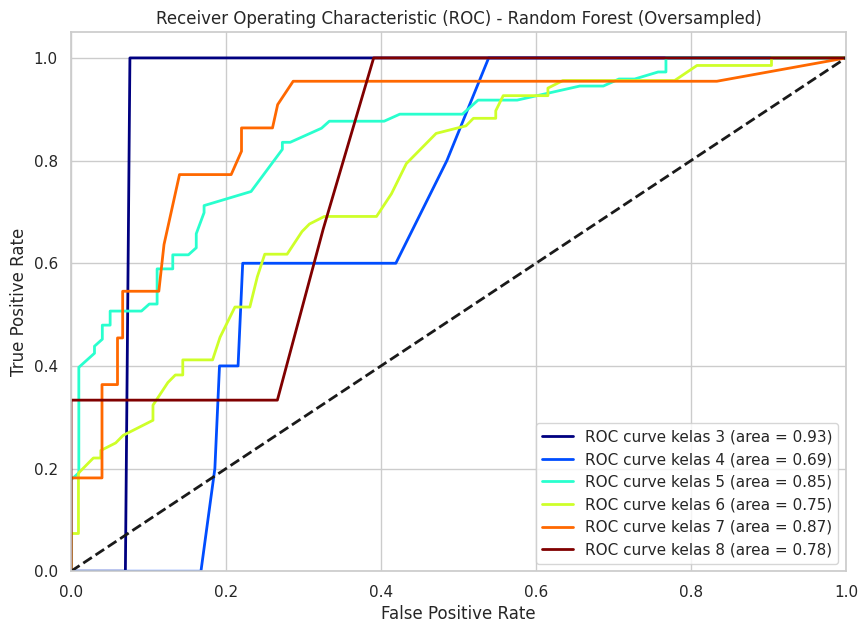

------------------------------



In [42]:
print(f"--- 10. Visualisasi ROC-AUC untuk Model Terbaik: {best_model_name} ---")

# Dapatkan model terbaik dan probabilitasnya
best_model_obj = trained_models[best_model_name]
y_proba_best = results[best_model_name]['proba']

# Binarize y_val untuk plot ROC multi-class
classes = best_model_obj.classes_
y_val_bin = label_binarize(y_val, classes=classes)
n_classes = len(classes)

# Hitung ROC curve dan ROC area untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_proba_best[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 7))
colors = plt.cm.get_cmap('jet', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i / n_classes), lw=2,
             label=f'ROC curve kelas {classes[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) - {best_model_name}')
plt.legend(loc="lower right")
plt.show()
print("-" * 30 + "\n")

**11. Prediksi (Labeling) pada Data Unlabeled**

In [44]:
print("--- 11. Prediksi pada Data Unlabeled ---")

# Dapatkan 2 model terbaik
model_1 = trained_models[best_model_name]
model_2 = trained_models[second_best_model_name]

# Lakukan prediksi pada data X_unlabeled_scaled
pred_1 = model_1.predict(X_unlabeled_scaled)
pred_2 = model_2.predict(X_unlabeled_scaled)

# Buat file submission
submission_1 = pd.DataFrame({'Id': test_ids, 'quality': pred_1})
submission_2 = pd.DataFrame({'Id': test_ids, 'quality': pred_2})

print(f"Prediksi dari model terbaik ({best_model_name})")
print(submission_1.head())
print(f"\nPrediksi dari model terbaik kedua ({second_best_model_name})")
print(submission_2.head())
print("\n--- Proses Selesai ---")

--- 11. Prediksi pada Data Unlabeled ---
Prediksi dari model terbaik (Random Forest (Oversampled))
     Id  quality
0   222        5
1  1514        6
2   417        5
3   754        5
4   516        6

Prediksi dari model terbaik kedua (Random Forest (Original))
     Id  quality
0   222        5
1  1514        6
2   417        5
3   754        5
4   516        5

--- Proses Selesai ---


**12. Visualisasi Distribusi Prediksi pada Data Unlabeled**


--- 12. Visualisasi Distribusi Prediksi pada Data Unlabeled ---


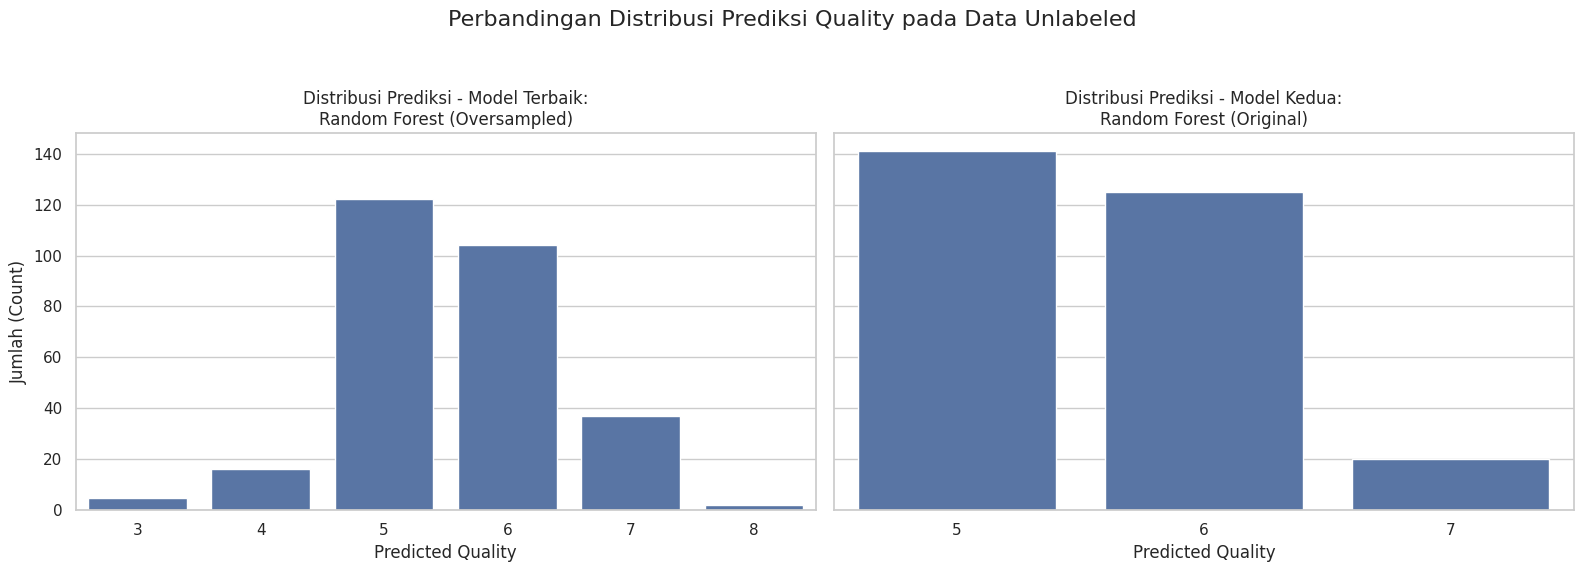


Visualisasi distribusi prediksi selesai.


In [46]:
print("\n--- 12. Visualisasi Distribusi Prediksi pada Data Unlabeled ---")

# Kita akan membuat dua plot untuk membandingkan hasil dari dua model terbaik
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True) # sharey=True agar skala Y sama

# 1. Plot untuk Model Terbaik (submission_1)
sns.countplot(
    ax=axes[0],
    x='quality',
    data=submission_1,
    order=sorted(submission_1['quality'].unique()) # Urutkan label x
)
axes[0].set_title(f'Distribusi Prediksi - Model Terbaik:\n{best_model_name}')
axes[0].set_xlabel('Predicted Quality')
axes[0].set_ylabel('Jumlah (Count)')

# 2. Plot untuk Model Terbaik Kedua (submission_2)
sns.countplot(
    ax=axes[1],
    x='quality',
    data=submission_2,
    order=sorted(submission_2['quality'].unique()) # Urutkan label x
)
axes[1].set_title(f'Distribusi Prediksi - Model Kedua:\n{second_best_model_name}')
axes[1].set_xlabel('Predicted Quality')
axes[1].set_ylabel('') # Sembunyikan label Y karena sama dengan plot kiri

# Memberi judul keseluruhan untuk kedua plot
plt.suptitle('Perbandingan Distribusi Prediksi Quality pada Data Unlabeled', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.94]) # Atur layout agar suptitle tidak tumpang tindih
plt.show()

print("\nVisualisasi distribusi prediksi selesai.")

In [47]:
# Simpan ke file CSV
filename_1 = f'/content/submission_{best_model_name.replace(" ", "_").replace("(", "").replace(")", "")}.csv'
filename_2 = f'/content/submission_{second_best_model_name.replace(" ", "_").replace("(", "").replace(")", "")}.csv'

submission_1.to_csv(filename_1, index=False)
submission_2.to_csv(filename_2, index=False)